Select the forder of drive


## Load the required modeules

In [2]:
import numpy as np 

import pandas as pd 
from matplotlib import pyplot as plt

import sklearn.neighbors as nb

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


from sklearn.decomposition import PCA


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

import sklearn.model_selection as cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## load the dataset

In [3]:
df = pd.read_csv("dataset.csv")
print(df.shape)
df.head()

(1647, 124)


name        position  team_games_played  time_played  \
0    Aarón Escandell         Portero                  8            0   
1  Abdallahi Mahmoud  Centrocampista                  9           45   
2    Abdoulaye Diaby  Centrocampista                  8           17   
3      Adnan Januzaj  Centrocampista                  9          185   
4       Adrián López       Delantero                  8          314   

   successful_layoffs  open_play_passes  times_tackled  backward_passes  \
0                   0                 0              0                0   
1                   1                 4              1                1   
2                   0                 8              2                1   
3                   0                94              4               25   
4                   3                94             12               23   

   successful_passes_opposition_half  unsuccessful_launches  ...  \
0                                  0                      0  ...   
1                                  2                      1  ...   
2                                  5                      0  ...   
3                                 64                      0  ...   
4                                 56                      0  ...   

   saves_from_penalty  set_pieces_goals  last_man_tackle  \
0                   0                 0                0   
1                   0                 0                0   
2                   0                 0                0   
3                   0                 0                0   
4                   0                 0                0   

   clearances_off_the_line  saves_made_caught  penalties_off_target  \
0                        0                  0                     0   
1                        0                  0                     0   
2                        0                  0                     0   
3                        0                  0                     0   
4                        0                  0                     0   

   own_goal_scored  drops  crosses_not_claimed  other_goals  
0                0      0                    0            0  
1                0      0                    0            0  
2                0      0                    0            0  
3                0      0                    0            0  
4                0      0                    0            0  

[5 rows x 124 columns]

## Preprocesing
### Clean Data

In [4]:
# Remove Unknow values
df_processed = df.dropna()

df_processed = df_processed.drop(['team_games_played'], 1)

df_processed = df_processed[df_processed["time_played"] > 100]


# shuffle the DataFrame rows 
df_processed = df_processed.sample(frac = 1) 
df_processed = df_processed.reset_index(drop=True)

le = LabelEncoder()
df_processed ['position']= le.fit_transform(df_processed['position'])

print(df_processed.shape)
df_processed.head()

(1073, 123)


name  position  time_played  successful_layoffs  \
0  Mauro Arambarri         0          716                   2   
1     Noelia Ramos         3          450                   0   
2   Filip Malbasic         2          229                   2   
3      Marta Unzué         0          220                   0   
4     Borja García         0          504                   7   

   open_play_passes  times_tackled  backward_passes  \
0               219             12               22   
1                 0              0                0   
2                33              7                8   
3                 1              0                0   
4               226             18               64   

   successful_passes_opposition_half  unsuccessful_launches  \
0                                114                     11   
1                                  0                      0   
2                                 16                      1   
3                                  1                      0   
4                                121                      2   

   unsuccessful_long_passes  ...  saves_from_penalty  set_pieces_goals  \
0                        23  ...                   0                 0   
1                         0  ...                   0                 0   
2                         3  ...                   0                 0   
3                         0  ...                   0                 0   
4                         3  ...                   0                 0   

   last_man_tackle  clearances_off_the_line  saves_made_caught  \
0                0                        0                  0   
1                0                        0                  0   
2                0                        0                  0   
3                0                        0                  0   
4                0                        0                  0   

   penalties_off_target  own_goal_scored  drops  crosses_not_claimed  \
0                     0                0      0                    0   
1                     0                0      0                    0   
2                     0                0      0                    0   
3                     0                0      0                    0   
4                     0                0      0                    0   

   other_goals  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 123 columns]

### Normalize data

In [5]:
X = df_processed.values[:, 2:]
X=Normalizer().fit_transform(X)

y = df_processed.values[:, 1].tolist()
# y = LabelEncoder().fit_transform(y)

n_by_state = df_processed.groupby("position")["position"].count()
n_by_state.head(10)


position
0    355
1    362
2    282
3     74
Name: position, dtype: int64

### LDA for dimensionality reduction

In [6]:
from sklearn.model_selection import StratifiedKFold

lda = LinearDiscriminantAnalysis(n_components=3)

X_lda = lda.fit(X, y).transform(X)

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X_lda, y, test_size=.33, random_state=1)

### Data Visualization

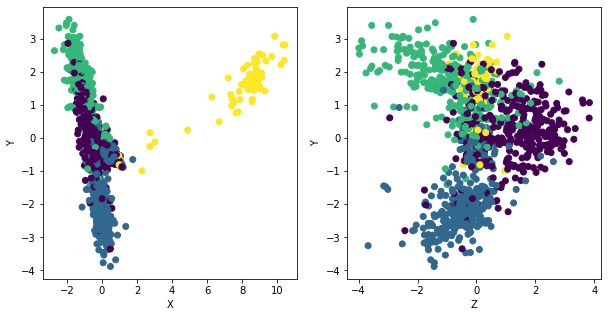

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].scatter(X_lda[:, 0], X_lda[:, 1],c=y)
axs[1].scatter(X_lda[:, 2], X_lda[:, 1],c=y)

axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_xlabel('Z')
axs[1].set_ylabel('Y')

plt.show()

In [8]:
import ipyvolume as ipv
from matplotlib import colors
import matplotlib

cmap = colors.ListedColormap(y)
#[name for name, color in cmap.items()]
c = matplotlib.cm.tab10(np.linspace(0, 1, 10))
colors = [c[i] for i in y]

fig = ipv.pylab.figure()
scater = ipv.scatter(X_lda[:, 0], X_lda[:, 1],X_lda[:, 2], color=colors, marker = 'sphere',edgecolor='none', alpha=0.5,cmap='tab10')
ipv.pylab.show()

## Data Mining

In [9]:
columns = df_processed.keys()
n_columns = len(columns) - 2

### KNN

In [10]:
cv = StratifiedKFold(n_splits=10)

params = {'n_neighbors':list(range(1,n_columns,2)), 'weights':('distance','uniform')}
knc_clf = nb.KNeighborsClassifier()
clf = GridSearchCV(knc_clf, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
parval=clf.best_params_

knc_clf = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc_clf.fit(X_train, y_train)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 67, 'weights': 'uniform'} Accuracy= 0.7897691705790298


In [11]:
knn_pred=knc_clf.predict(X_test)
print(f'Accuracy score= {accuracy_score(y_test, knn_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, knn_pred)}')

Accuracy score= 0.8056338028169014
Confusion Matrix:
[[ 83  13  16   0]
 [ 16 111   2   0]
 [ 14   3  68   0]
 [  0   5   0  24]]


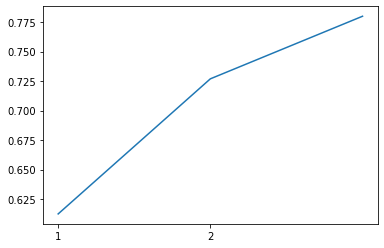

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

original = np.zeros(3)
for i in range(3):
    X_new = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X_lda, y)
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')  
    original[i]=np.mean(cv_scores)

plt.xticks(np.arange(0, 3, step=1))
plt.plot(range(1,4),original)
plt.show()

### NaiveBayes

In [27]:
gnb_clf = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnb_clf, 
                 param_grid=params_NB, 
                 cv=cv,   # use any cross validation technique 
                 verbose=0, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

{'var_smoothing': 0.03511191734215131}

In [28]:
from sklearn.model_selection import cross_val_predict 
gnb_clf = GaussianNB(var_smoothing = gs_NB.best_params_['var_smoothing'])
gnb_clf.fit(X_train, y_train)

nb_pred= gnb_clf.predict(X_test)

print(f'Accuracy score= {accuracy_score(y_test, nb_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, nb_pred)}')

Accuracy score= 0.7971830985915493
Confusion Matrix:
[[ 80  15  17   0]
 [ 12 116   1   0]
 [ 16   6  63   0]
 [  0   5   0  24]]


### Decision Tree

In [29]:
param_grid = {'max_depth': range(2,16,2), 'min_samples_split': range(2,16,2)}

clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=cv , n_jobs=1, verbose=0)

clf.fit(X_train, y_train)
clf.best_params_, clf.best_score_

({'max_depth': 6, 'min_samples_split': 14}, 0.7701682316118935)

In [30]:
from sklearn import tree
from statsmodels.stats.proportion import proportion_confint

dtc_clf = tree.DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=0.01,  max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'])
dtc_clf = dtc_clf.fit(X_train, y_train)

In [16]:
## Print tree
fig = plt.gcf()
fig.set_size_inches(200, 100)

tree.plot_tree(dtc_clf, filled=True, rounded=True, feature_names=list([0,1,2]))
plt.show()

In [31]:
dtc_pred = dtc_clf.predict(X_test)

print(f'Accuracy score= {accuracy_score(y_test, dtc_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, dtc_pred)}')
print(f'Classification Report:\n{classification_report(y_test, dtc_pred)}')
epsilon = accuracy_score(y_test, dtc_pred)
print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

Accuracy score= 0.7971830985915493
Confusion Matrix:
[[ 97   7   8   0]
 [ 23 105   1   0]
 [ 25   3  57   0]
 [  1   4   0  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       112
           1       0.88      0.81      0.85       129
           2       0.86      0.67      0.75        85
           3       1.00      0.83      0.91        29

    accuracy                           0.80       355
   macro avg       0.85      0.79      0.81       355
weighted avg       0.82      0.80      0.80       355

Confidence interval:  (0.7523186656051561, 0.8369516756699007)


### Support Vector Machines

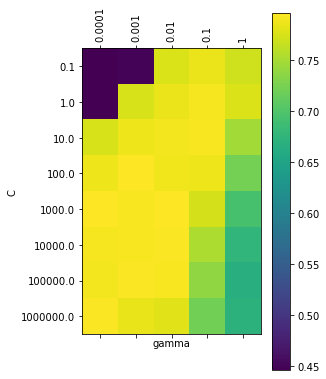


Best combination of parameters found:  {'C': 1000.0, 'gamma': 0.01}


In [36]:
gammas = [0.0001,0.001,0.01,0.1,1]
Cs = np.logspace(-1, 6, num=8, base=10.0)

param_grid = { 'C': Cs, 'gamma': gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10).fit(X_train, y_train)
parval = grid_search.best_params_

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
print("\nBest combination of parameters found: ",parval)

In [19]:
svc_clf = SVC(C=parval['C'], gamma=parval['gamma'], random_state=42, probability=True).fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
pred = svc_clf.predict(X_test)
print("Confusion matrix on test set:\n",confusion_matrix(y_test, pred))
print("Accuracy on test set: ",accuracy_score(y_test, pred))
print("Best value of parameter C found: ",parval)

Confusion matrix on test set:
 [[ 80  12  20   0]
 [ 18 109   2   0]
 [ 10   3  72   0]
 [  0   5   0  24]]
Accuracy on test set:  0.8028169014084507
Best value of parameter C found:  {'C': 1000.0, 'gamma': 0.01}


### Test set of ensemblers and Meta-learning algorithms

In [20]:
from prettytable import PrettyTable
t = PrettyTable(['Model', 'Accuracy'])

etc_clf = ExtraTreesClassifier(n_estimators=200,random_state=1).fit(X_train, y_train)
abc_clf = AdaBoostClassifier(n_estimators=500,random_state=1).fit(X_train, y_train)
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
log_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=10000).fit(X_train, y_train)
bc_clf = BaggingClassifier(n_estimators=400,max_features=0.35,random_state=1).fit(X_train, y_train)

clasifier_set = []
for clf, lable in zip([knc_clf, dtc_clf, gnb_clf, svc_clf, etc_clf, abc_clf, rnd_clf, log_clf, bc_clf], ['K Neighbors','Decision Tree','Gaussian NB','Support Vector Machines','Extra Trees','Ada Boost', 'Random Forest', 'Logistic Regression', 'Bagging']):
    pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    t.add_row([lable, accuracy])
    if accuracy > 0.75:
      clasifier_set.append((lable, clf))
print(t)

+-------------------------+--------------------+
|          Model          |      Accuracy      |
+-------------------------+--------------------+
|       K Neighbors       | 0.8056338028169014 |
|      Decision Tree      | 0.7971830985915493 |
|       Gaussian NB       | 0.7943661971830986 |
| Support Vector Machines | 0.8028169014084507 |
|       Extra Trees       | 0.7887323943661971 |
|        Ada Boost        | 0.6197183098591549 |
|      Random Forest      |        0.8         |
|   Logistic Regression   | 0.8169014084507042 |
|         Bagging         | 0.6901408450704225 |
+-------------------------+--------------------+


In [21]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=clasifier_set, voting='hard')
eclf.fit(X_train, y_train)
pred = eclf.predict(X_test)

print(f'Accuracy score= {accuracy_score(y_test, pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, pred)}')
print(f'Classification Report:\n{classification_report(y_test, pred)}')
epsilon = accuracy_score(y_test, pred)
print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

Accuracy score= 0.8169014084507042
Confusion Matrix:
[[ 86  12  14   0]
 [ 16 112   1   0]
 [ 14   3  68   0]
 [  0   5   0  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       112
           1       0.85      0.87      0.86       129
           2       0.82      0.80      0.81        85
           3       1.00      0.83      0.91        29

    accuracy                           0.82       355
   macro avg       0.85      0.82      0.83       355
weighted avg       0.82      0.82      0.82       355

Confidence interval:  (0.7734608258359491, 0.8545219528149474)


In [22]:
clasifier_set.append(('VotingClassifier', eclf))

In [23]:
from prettytable import PrettyTable
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
t = PrettyTable(['Model', 'Accuracy', 'F1', 'Recall', 'Precision'])
for lable, clf in clasifier_set:
  pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred, average='weighted')
  rp = precision_recall_fscore_support(y_test, pred, average='weighted')
  t.add_row([lable, accuracy,f1, rp[0], rp[1]])
print(t)

+-------------------------+--------------------+--------------------+--------------------+--------------------+
|          Model          |      Accuracy      |         F1         |       Recall       |     Precision      |
+-------------------------+--------------------+--------------------+--------------------+--------------------+
|       K Neighbors       | 0.8056338028169014 | 0.8062584201882489 | 0.8083156669817405 | 0.8056338028169014 |
|      Decision Tree      | 0.7971830985915493 |  0.79968242705681  | 0.8187143076759582 | 0.7971830985915493 |
|       Gaussian NB       | 0.7943661971830986 | 0.7930696365958249 | 0.7952078076776422 | 0.7943661971830986 |
| Support Vector Machines | 0.8028169014084507 | 0.803094604693234  | 0.8058291434977081 | 0.8028169014084507 |
|       Extra Trees       | 0.7887323943661971 | 0.7893338468131464 | 0.7905371608428976 | 0.7887323943661971 |
|      Random Forest      |        0.8         | 0.8001821096067931 | 0.8010633993663879 |        0.8   

### VisualRepresentation

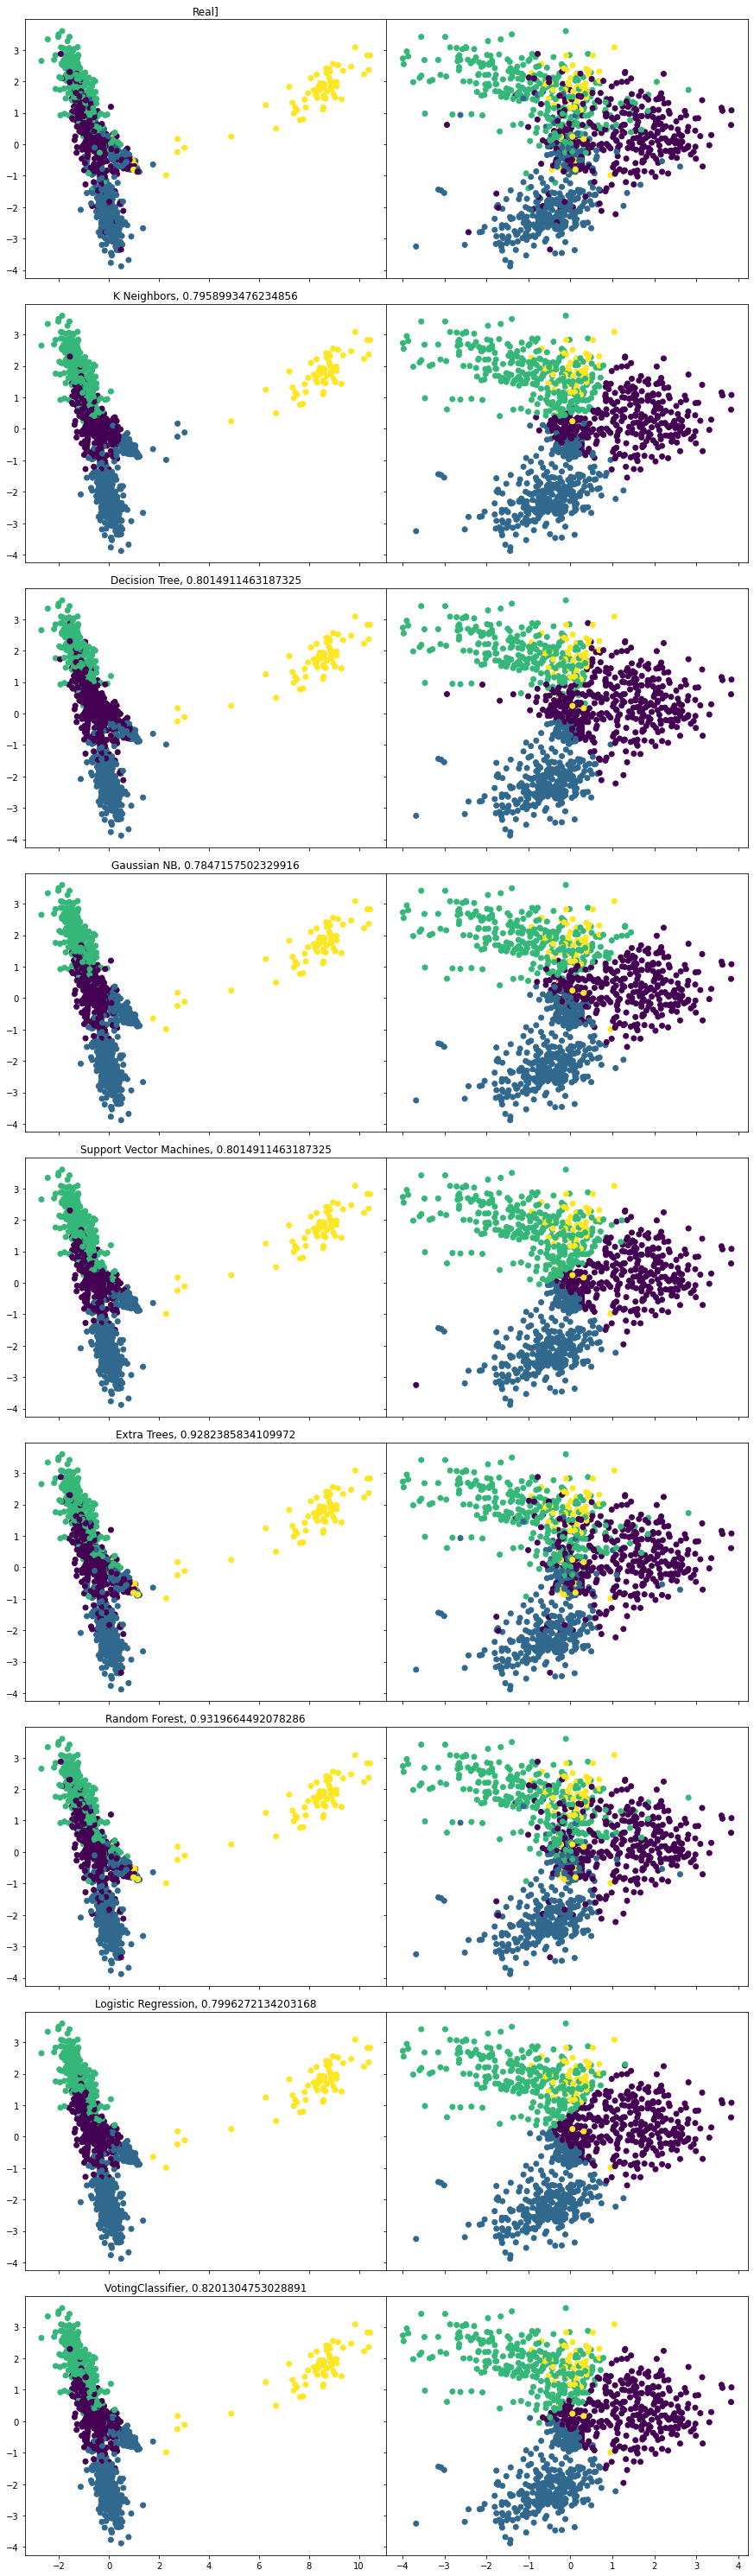

In [24]:
fig, axs = plt.subplots(len(clasifier_set)+1, 2, figsize=(15,6*(len(clasifier_set)+1)),sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0})

axs[0, 0].scatter(X_lda[:, 0], X_lda[:, 1],c=y)
axs[0, 1].scatter(X_lda[:, 2], X_lda[:, 1],c=y)
axs[0, 0].set_title('Real]')

c = 1
for lable, clf in clasifier_set:
  pred = clf.predict(X_lda)
  axs[c, 0].scatter(X_lda[:, 0], X_lda[:, 1],c=pred)
  axs[c, 1].scatter(X_lda[:, 2], X_lda[:, 1],c=pred)


  axs[c, 0].set_title(f'{lable}, {accuracy_score(y, pred)}')
  c+=1


plt.show()

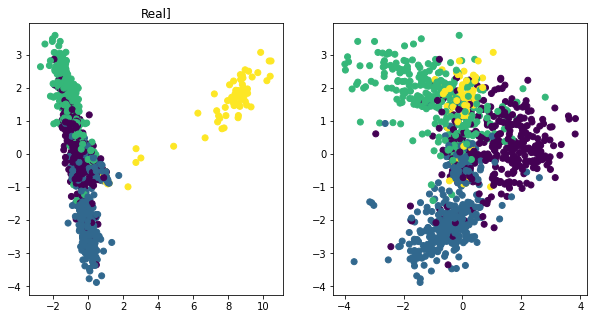

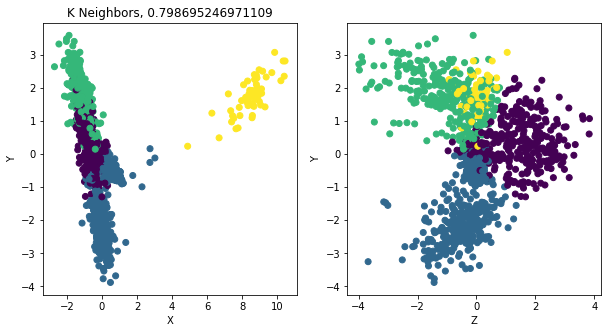

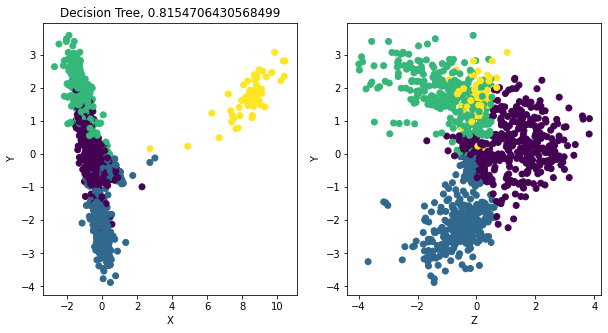

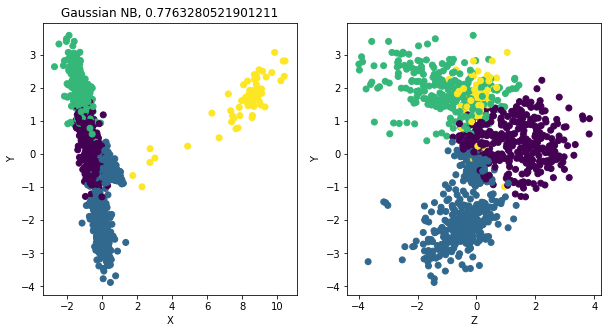

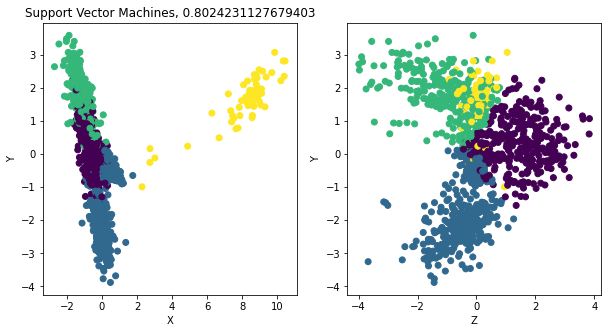

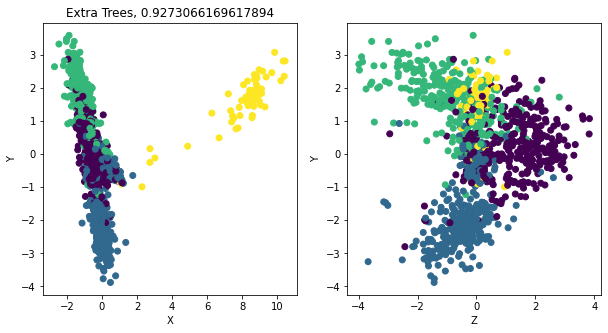

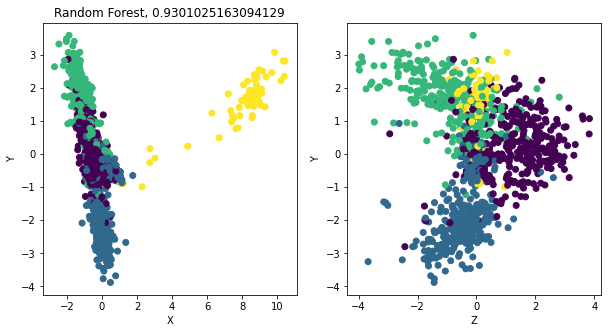

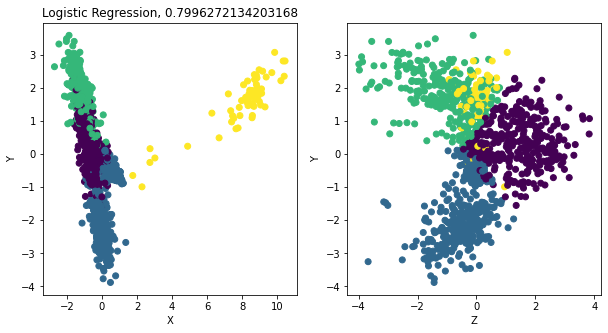

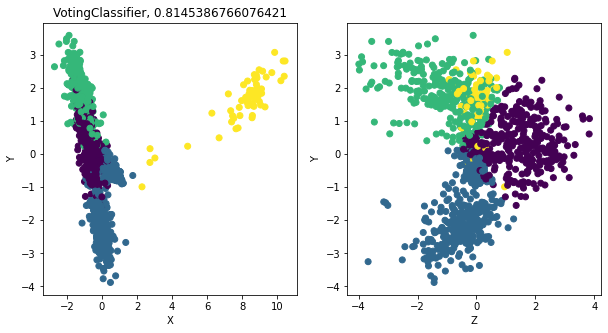

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].scatter(X_lda[:, 0], X_lda[:, 1],c=y)
axs[1].scatter(X_lda[:, 2], X_lda[:, 1],c=y)
axs[0].set_title('Real]')

plt.show()
c = 1
for lable, clf in clasifier_set:
  pred = clf.predict(X_lda)
  axs[0].scatter(X_lda[:, 0], X_lda[:, 1],c=pred)
  axs[1].scatter(X_lda[:, 2], X_lda[:, 1],c=pred)

  fig, axs = plt.subplots(1, 2, figsize=(10,5))

  axs[0].scatter(X_lda[:, 0], X_lda[:, 1],c=pred)
  axs[1].scatter(X_lda[:, 2], X_lda[:, 1],c=pred)

  axs[0].set_xlabel('X')
  axs[0].set_ylabel('Y')
  axs[1].set_xlabel('Z')
  axs[1].set_ylabel('Y')


  axs[0].set_title(f'{lable}, {accuracy_score(y, pred)}')



  plt.show()






In [ ]:
df.loc[df['name'] == 'Lionel Andrés Messi']

name   position  ...  crosses_not_claimed  other_goals
304  Lionel Andrés Messi  Delantero  ...                    0            0

[1 rows x 124 columns]

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Model', 'Posició real', 'Posició estimada'])

for i in ['Lionel Andrés Messi', ]:
  jugador_index = df_processed.loc[df_processed['name'] == i].index.values.astype(int)[0]
  x = X_lda[jugador_index]
  real_pos = le.inverse_transform([y[jugador_index]])[0]
  for lable, clf in clasifier_set:
    pred = clf.predict([x])
    predict_name = le.inverse_transform(pred)[0]
    t.add_row([lable, real_pos, predict_name])
print(t)

+---------------------+--------------+------------------+
|        Model        | Posició real | Posició estimada |
+---------------------+--------------+------------------+
|     K Neighbors     |  Delantero   |    Delantero     |
|    Decision Tree    |  Delantero   |    Delantero     |
|     Gaussian NB     |  Delantero   |  Centrocampista  |
|         SVC         |  Delantero   |    Delantero     |
|     Extra Trees     |  Delantero   |    Delantero     |
|      Ada Boost      |  Delantero   |    Delantero     |
|    Random Forest    |  Delantero   |    Delantero     |
| Logistic Regression |  Delantero   |    Delantero     |
|       Bagging       |  Delantero   |    Delantero     |
|   VotingClassifier  |  Delantero   |    Delantero     |
+---------------------+--------------+------------------+


In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np 
from numpy import argmax

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(4, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_padded = np.array(X_train)
training_labels = np.array(y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(y_test)

In [ ]:
# fit the model
model.fit(training_padded, training_labels, epochs=550, batch_size=32, verbose=1)
# evaluate the model
loss, acc = model.evaluate(testing_padded, testing_labels, verbose=0)

In [ ]:
acc

0.7661972045898438